# Basic Handling of Data
by [David Ohm](http://ohmdsp.github.io/)
/ [GitHub](https://github.com/ohmdsp)

Tutorial on working with data and the tensorflow framework.

### Loading and Structuring Data

For supervised training, we need a collection of data (i.e., dataset).  Often, we need a lot of data.  We're going to create a dataset by putting a bunch of images inside a directory. Then, whenever we want to load the dataset, we will use python to find and load all the images inside the directory.  Python makes it easy to crawl through a directory and grab each file.

### Using the `os` library to get data

We'll practice with the very large dataset called Celeb Net.  This dataset has about 200,000 images of celebrities.  The researchers also provide a version of the dataset which has every single face cropped and aligned.  We'll be using the aligned dataset.  To read more about the dataset or to download it, follow the link here: http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

For now, we're not going to use the entire dataset, only a subset of it.  Run the following cell which will download the first 10 images for you:

In [1]:
import os
dir =  '\\Users\\ohmds\\development\\data\\img_align_celeba'
for file_i in os.listdir('\\Users\\ohmds\\development\\data\\img_align_celeba'):
    print(file_i)

000001.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000009.jpg
000010.jpg


In [2]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
dataset_dir = '\\Users\\ohmds\\development\\data\\img_align_celeba'
if os.path.isdir(dataset_dir) == False:
    print("Dataset directory does not exist...creating now...")
    os.mkdir('\\Users\\ohmds\\development\\data\\img_align_celeba')

    # Now perform the following 10 times:
    for img_i in range(1, 11):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print out each file as it downloads
        print(url)

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('\\Users\\ohmds\\development\\data\\img_align_celeba', f))
    
else:
    print("Dataset directory already exists.")

Dataset directory already exists.


In [3]:
# Make a list of the files and store in a variable
#files = os.listdir('/data/img_align_celeba')
files = [file_i
         for file_i in os.listdir('\\Users\\ohmds\\development\\data\\img_align_celeba')
         if file_i.endswith('.jpg')]

files

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg']

In [4]:
# print out names of first two files in list (note: files are not listed in order)
print(files[0])
print(files[1])

000001.jpg
000002.jpg


In [5]:
# Or print from reverse direction (i.e., from end of list)
print(files[-1])

000010.jpg


## Loading an image

`matplotlib` is a useful python library for playing with visualization and loading of image data.  We can import it like so:

In [6]:
import matplotlib.pyplot as plt

In [7]:
# We'll now tell matplotlib to "inline" plots using an ipython magic function:
%matplotlib inline

In [8]:
#plt.imread?

In [9]:
import numpy as np
# help(np)
# np.<tab>

Let's try loading the first image in our dataset:

We have a list of filenames, and we know where they are.  But we need to combine the path to the file and the filename itself.  If we try and do this:

In [10]:
print(os.path.join('\\Users\\ohmds\\development\\data\\img_align_celeba', files[0]))
plt.imread(os.path.join('\\Users\\ohmds\\development\\data\\img_align_celeba', files[0]))

\Users\ohmds\development\data\img_align_celeba\000001.jpg


array([[[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ...,
        [247, 226, 225],
        [254, 238, 222],
        [254, 238, 222]],

       [[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ...,
        [249, 228, 225],
        [254, 238, 222],
        [254, 238, 222]],

       [[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ...,
        [250, 231, 227],
        [255, 239, 223],
        [255, 239, 223]],

       ...,

       [[140,  74,  26],
        [116,  48,   1],
        [146,  78,  33],
        ...,
        [122,  55,  28],
        [122,  56,  30],
        [122,  56,  30]],

       [[130,  62,  15],
        [138,  70,  23],
        [166,  98,  53],
        ...,
        [118,  49,  20],
        [118,  51,  24],
        [118,  51,  24]],

       [[168, 100,  53],
        [204, 136,  89],
        [245, 177, 132],
        ...,
        [118,  49,  20],
        [120,  50,  24],
        [120,  50,  24]]

Now we get a bunch of numbers. I would rather not have to keep prepending the path to my files, so I can create the list of files like so:

In [11]:
files = [os.path.join('\\Users\\ohmds\\development\\data\\img_align_celeba', file_i)
        for file_i in os.listdir('\\Users\\ohmds\\development\\data\\img_align_celeba')
        if '.jpg' in file_i]

## RGB Image Representation

It turns out that all of these numbers are capable of describing an image.  We can use the function `imshow` to see this:

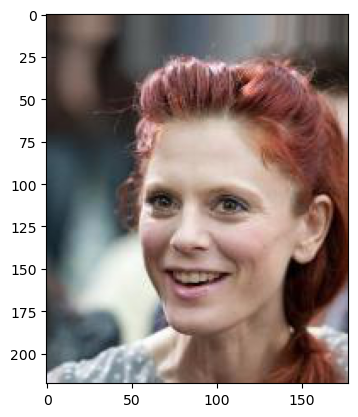

In [12]:
img = plt.imread(files[1])
plt.imshow(img)

In [13]:
img.shape

(218, 178, 3)

This means that the image has 218 rows, 178 columns, and 3 color channels corresponding to the Red, Green, and Blue channels of the image, or RGB.  Let's try looking at just one of the color channels.  We can use the square brackets just like when we tried to access elements of our list:

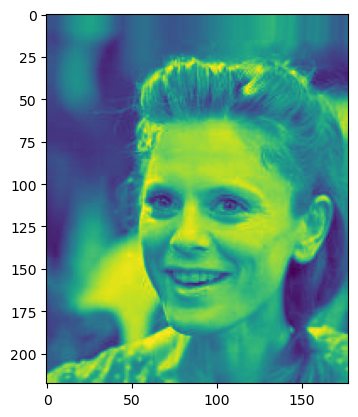

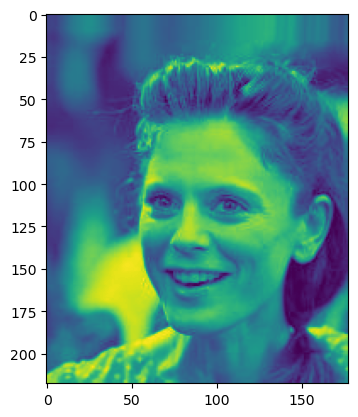

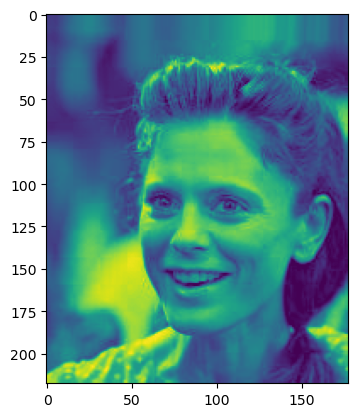

In [14]:
plt.figure()
plt.imshow(img[:, :, 0])
plt.figure()
plt.imshow(img[:, :, 1])
plt.figure()
plt.imshow(img[:, :, 2])

## Understanding data types and ranges (uint8, float32)

Let's take a look at the range of values of our image:

In [15]:
np.min(img), np.max(img)

(0, 255)

The numbers are all between 0 to 255. We can represent 256 values in a byte.  We measure a byte using bits, and each byte takes up 8 bits.  Each bit can be either 0 or 1.  When we stack up 8 bits, or 10000000 in binary, equivalent to 2 to the 8th power, we can express up to 256 possible values, giving us our range, 0 to 255.  You can compute any number of bits using powers of two.  2 to the power of 8 is 256.

In [16]:
img.dtype

dtype('uint8')

`uint8`:  is an  `unsigned`, `int`, `8`.  That means the values do not have a sign - they are all positive.  They are only integers, meaning no decimal places. They are represented in 8 bits.

32-bits can express a single value with a range of nearly 4.3 billion different possibilities (2**32).  We'll often need to work with 32-bit data when working with neural networks.  In order to do that, we can simply ask numpy for the change data type:

In [17]:
img.astype(np.float32)

array([[[ 67.,  52.,  45.],
        [ 65.,  50.,  43.],
        [ 65.,  50.,  43.],
        ...,
        [ 76.,  72.,  69.],
        [ 82.,  79.,  72.],
        [ 84.,  81.,  74.]],

       [[ 67.,  52.,  45.],
        [ 65.,  50.,  43.],
        [ 65.,  50.,  43.],
        ...,
        [ 76.,  72.,  69.],
        [ 82.,  79.,  72.],
        [ 84.,  81.,  74.]],

       [[ 67.,  52.,  47.],
        [ 65.,  50.,  43.],
        [ 65.,  50.,  43.],
        ...,
        [ 76.,  72.,  69.],
        [ 82.,  79.,  72.],
        [ 84.,  81.,  74.]],

       ...,

       [[211., 211., 221.],
        [221., 221., 231.],
        [221., 221., 229.],
        ...,
        [128.,  90.,  87.],
        [136., 117., 111.],
        [147., 128., 122.]],

       [[227., 225., 236.],
        [222., 220., 231.],
        [215., 214., 222.],
        ...,
        [141., 102.,  97.],
        [138., 119., 112.],
        [138., 119., 112.]],

       [[227., 225., 236.],
        [222., 220., 231.],
        [215., 2

## Visualizing your data as images

We've seen how to look at a single image.  But what if we have hundreds, thousands, or millions of images?  Is there a good way of knowing what our dataset looks like without looking at their file names, or opening up each image one at a time?

One way we can do that is to randomly pick an image. To pick a random image from our list of files, we use the numpy random module.

In [18]:
print(np.random.randint(0, len(files)))
print(np.random.randint(0, len(files)))
print(np.random.randint(0, len(files)))

9
4
6


In [19]:
# helper function for plotting images
def plot_image(filename):
    img = plt.imread(filename)
    plt.imshow(img)

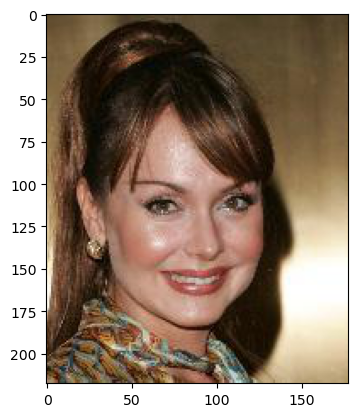

In [20]:
f = files[np.random.randint(0, len(files))]
plot_image(f)

In [21]:
img.shape

(218, 178, 3)

## Cropping images

We're going to create another function which will help us crop the image to a standard size.

Often, we will need all of our data to be the same size.  For images this means we'll need to crop the images while trying not to remove any of the important visual information.  Most image datasets that you'll find online already have a standard size for every image.  But if you're creating your own dataset, you'll need to know how to make all the images the same size.  One way to do this is to find the longest edge of the image, and crop this edge to be as long as the shortest edge of the image.  This will convert the image to a square one, meaning its sides will be the same lengths.  The reason for doing this is that we can then resize this square image to any size we'd like, without distorting the image.  Let's see how we can do this.

In [22]:
def imcrop_tosquare(img):
    """Make any image a sqaure image
    
    Parameters:
    img: (np.ndarray) Input image to crop
    crop: (np.darray) Cropped output image
    """
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2,:]
        else:
            crop = img[max(0,extra // 2 + 1):min(-1,-(extra //2)),:]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

Let's create another crop function which can crop by an arbitrary amount.  It will take an image and a single factor from 0-1, saying how much (e.g., percentage) of the original image to crop:

In [23]:
def imcrop(img, amt):
    if amt <= 0 or amt >= 1:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

## Resizing images

For resizing the image, we'll make use of a opencv.

In [24]:
import cv2

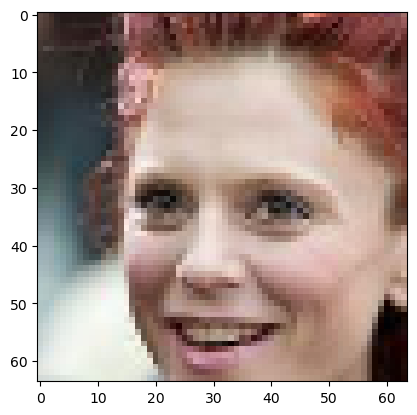

In [25]:
square = imcrop_tosquare(img)
crop = imcrop(square, 0.3)
rsz = cv2.resize(crop,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
plt.imshow(rsz)

Let's look at the grayscale version.

(64, 64)


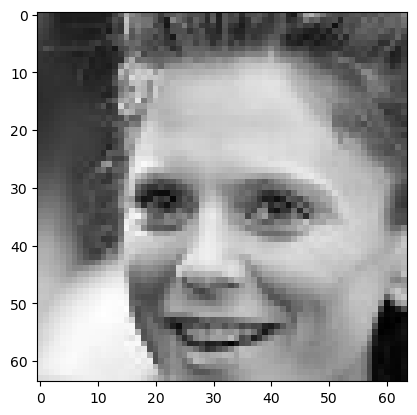

In [26]:
mean_img = np.mean(rsz, axis=2)
print(mean_img.shape)
plt.imshow(mean_img, cmap='gray')

## Cropping/Resizing All Images for a Dataset

We now have functions for cropping an image to a square image, and a function for resizing an image to any desired size.  With these tools, we can begin to create a dataset.  We're going to loop over our 10 files, crop the image to a square to remove the longer edge, and then crop again to remove some of the background, and then finally resize the image to a standard size of 64 x 64 pixels.

In [27]:
imgs = []
for file_i in files:
    img = plt.imread(file_i)
    square = imcrop_tosquare(img)
    crop = imcrop(square, 0.2)
    rsz = cv2.resize(crop,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
    imgs.append(rsz)
print(len(imgs))

10


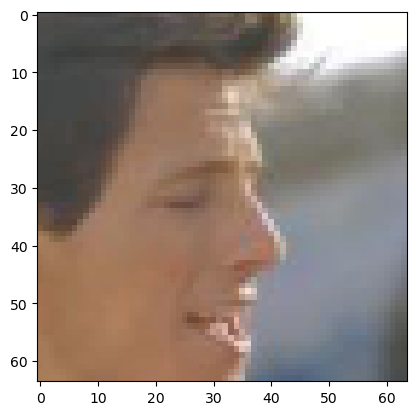

In [28]:
plt.imshow(imgs[2])

In [29]:
imgs[0].shape

(64, 64, 3)

## The Batch Dimension

There is a convention for storing many images in an array using a new dimension called the batch dimension.  The resulting image shape should be:

N x H x W x C

The Number of images, or the batch size, is first; then the Height or number of rows in the image; then the Width or number of cols in the image; then finally the number of channels the image has.  A Color image should have 3 color channels, RGB.  A Grayscale image should just have 1 channel.

We can combine all of our images to look like this in a few ways.  The easiest way is to tell numpy to give us an array of all the images:

In [30]:
data = np.array(imgs)
data.shape

(10, 64, 64, 3)

We could also use the `numpy.concatenate` function, but we have to create a new dimension for each image.  Numpy let's us do this by using a special variable `np.newaxis`

In [31]:
data = np.concatenate([img_i[np.newaxis] for img_i in imgs], axis=0)
data.shape

(10, 64, 64, 3)

The shape is describing batch, or number of images, the height, or rows of the image, the width, or columns of the image, and finally, the number of channels in the image, describing the red, green, and blue colors of the image. Try to remember at least one of these methods for building up your images as a large array as they can come in handy.